In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

###Q1 Import the dataset and try to understand what information each column is giving. What is our target variable? Is this a classification or regression problem?

Dataset link: https://drive.google.com/file/d/1A-iAsI3MUU6o9oh5AE1NG1kVU5KD60Ms/view?usp=sharing


In [2]:
#Import dataset
df=pd.read_csv('heart_study.csv')
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

sex : male or female (Nominal)

age : age of the patient (Continuous)

education: maximum level of education of the patient

currentSmoker : whether or not the patient is a current smoker (Nominal)

cigsPerDay : the number of cigarettes that the person smoked on average in one day (Continuous)

BPMeds : whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke : whether or not the patient had previously had a stroke (Nominal)

prevalentHyp : whether or not the patient was Hypertension (Nominal)

diabetes : whether or not the patient had diabetes (Nominal)

totChol : total cholesterol level (Continuous)

sysBP : systolic blood pressure (Continuous)

diaBP : diastolic blood pressure (Continuous)

BMI : Body Mass Index (Continuous)

heartRate : heart rate (Continuous)

glucose : glucose level (Continuous)

TenYearCHD : 10 year risk of Coronary Heart Disease (CHD) (binary: 1 (Yes), 0 (No))

###Q2. Are there any columns which give information about something totally irrelevant to whether a person has a heart disease or not? If yes, drop the column. Also rename the column 'male' to 'sex_male'.

In [3]:
#drop and/or rename columns
df=df.drop(['education'],axis=1)



In [4]:
print(df)

      male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4235     0   48              1        20.0     NaN                0   
4236     0   44              1        15.0     0.0                0   
4237     0   52              0         0.0     0.0                0   
4238     1   40              0         0.0     0.0                0   
4239     0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0   70.0  26.97       80.0   
1

In [5]:
df=df.rename(columns={'male':'sex_male'})

In [6]:
print(df)

      sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0            1   39              0         0.0     0.0                0   
1            0   46              0         0.0     0.0                0   
2            1   48              1        20.0     0.0                0   
3            0   61              1        30.0     0.0                0   
4            0   46              1        23.0     0.0                0   
...        ...  ...            ...         ...     ...              ...   
4235         0   48              1        20.0     NaN                0   
4236         0   44              1        15.0     0.0                0   
4237         0   52              0         0.0     0.0                0   
4238         1   40              0         0.0     0.0                0   
4239         0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0        

###Q3. Find the number of null values in each column and decide whether you can drop them or not. If you cannot drop them, use an appropriate method to deal with them

In [7]:
from itertools import count
#Deal with null values
null_counts = df.isnull().sum()


print("Null Value Counts:")
print(null_counts)

Null Value Counts:
sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


###Q4. The following code is set up for you, replace 'dataframe' with the name of the your variable. What do you understand from this EDA? Why do some graphs have only two bars, at 0 and 1 and others have multiple?

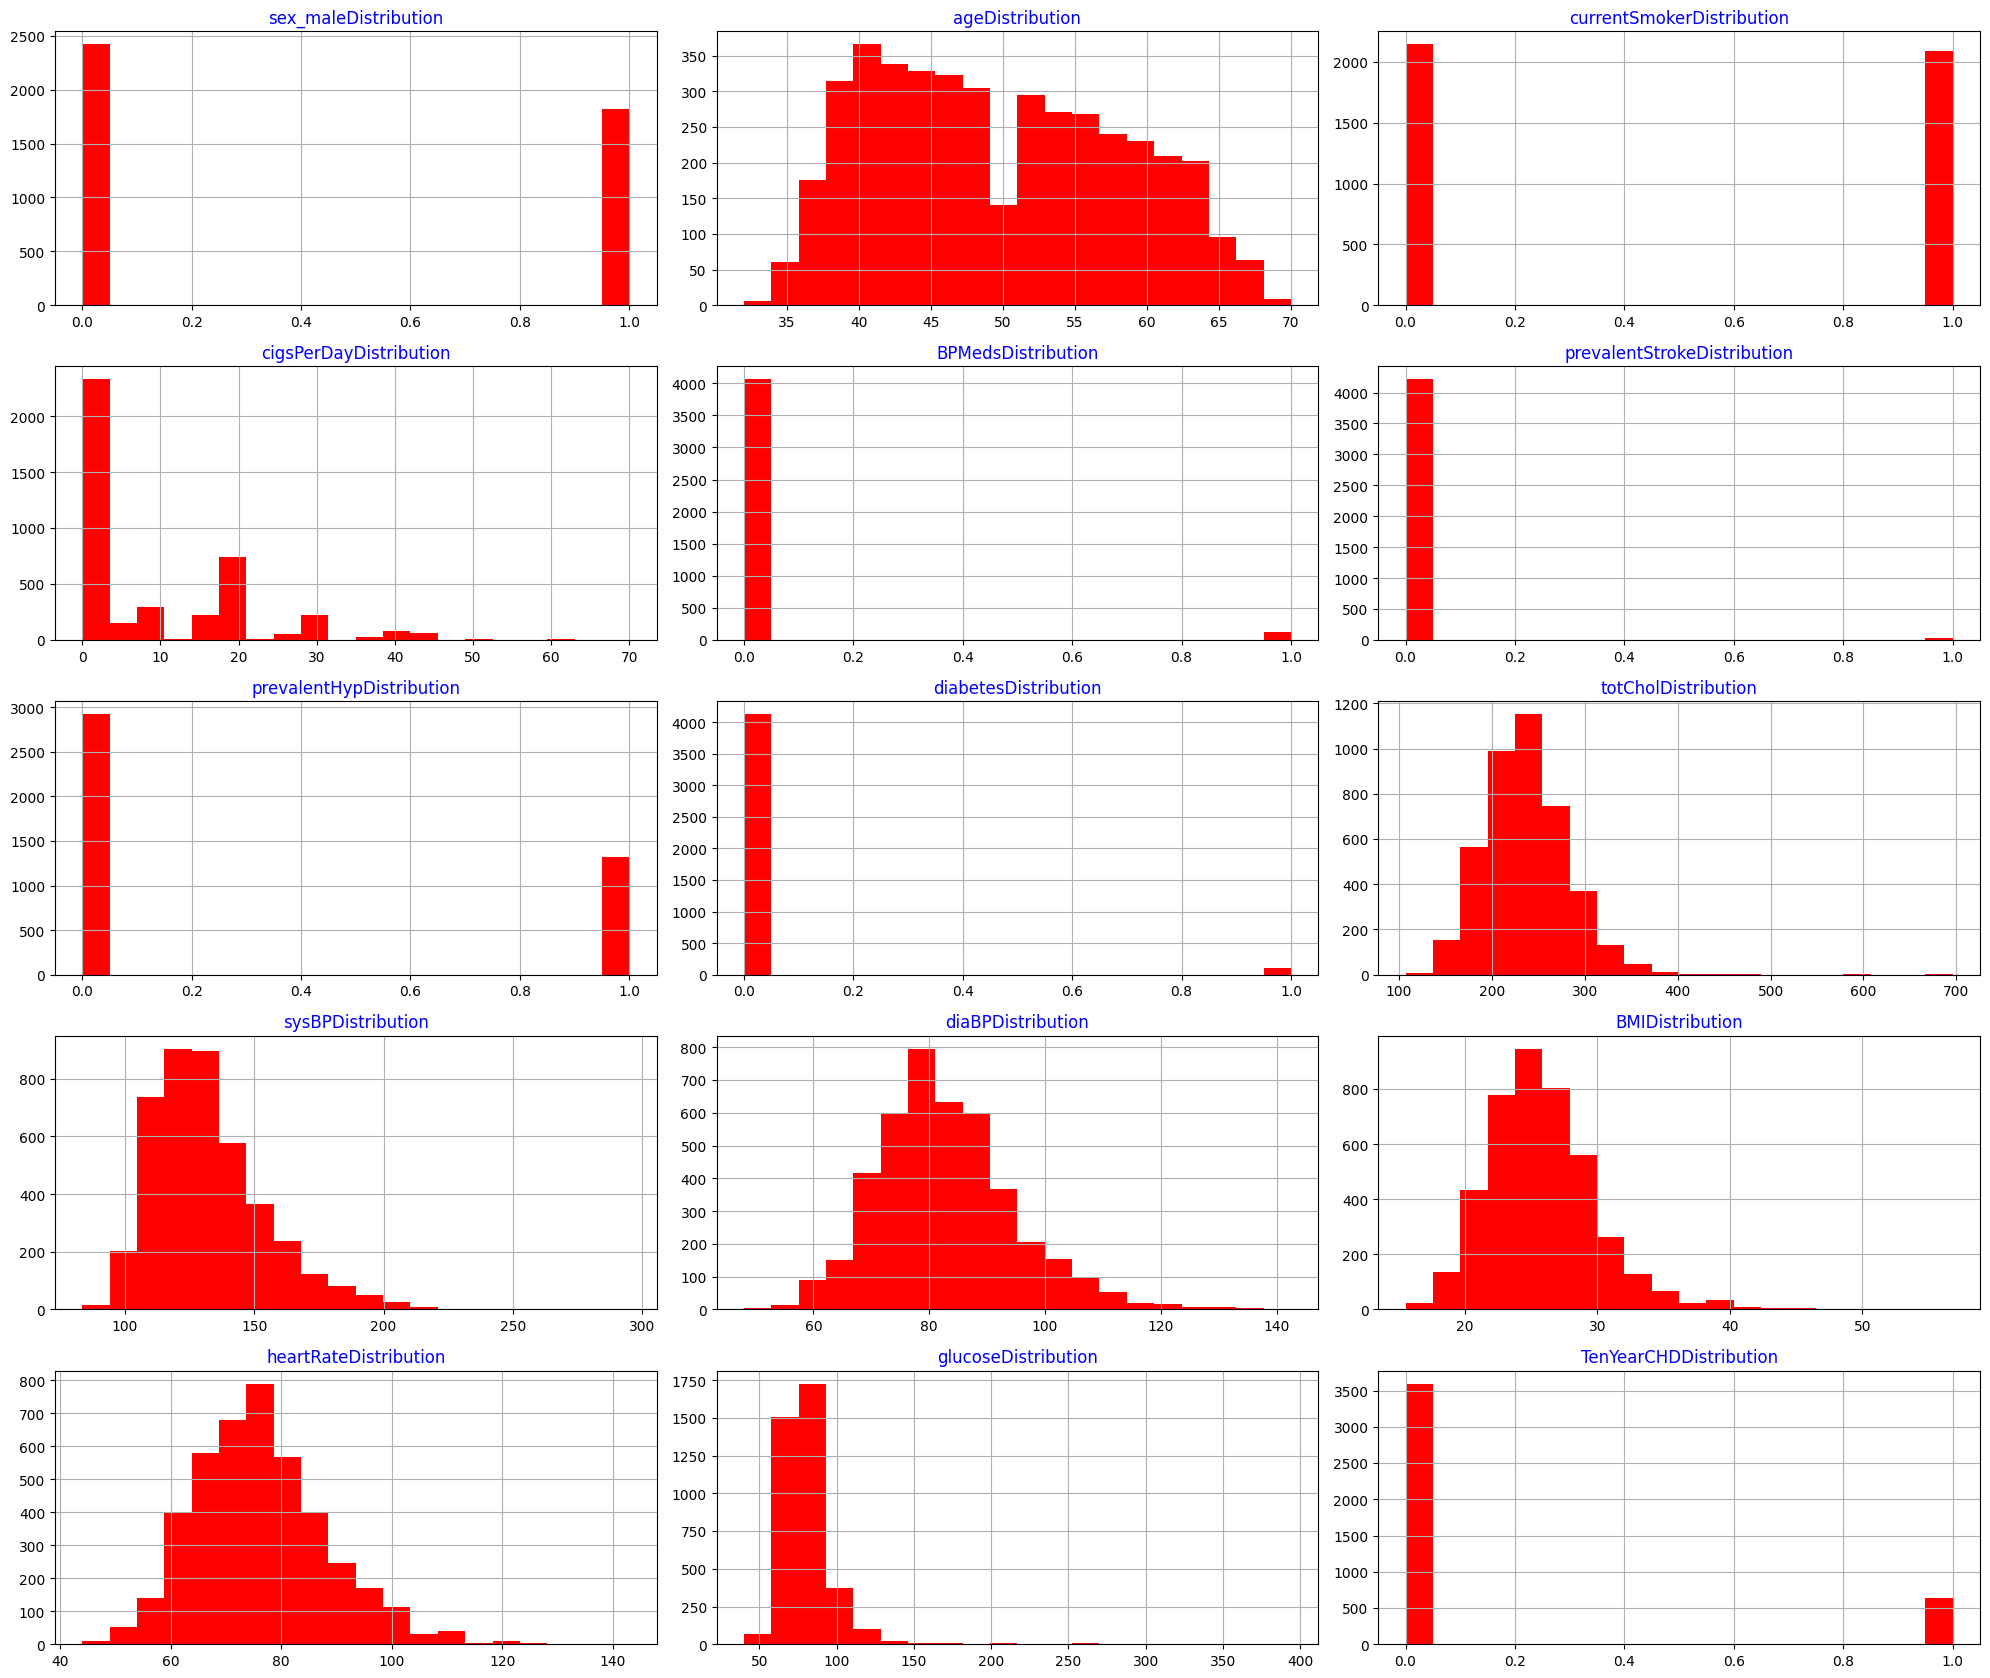

In [8]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+"Distribution", color='blue')
    fig.tight_layout()
    plt.show()
draw_histograms(df, df.columns, 6, 3)

In [9]:
#Some graphs have 0 and 1 as they consists of only binary numbers

###Q5. Using sns.countplot find out number of Positive cases and Negative cases in the dataset, i.e., in your target column.

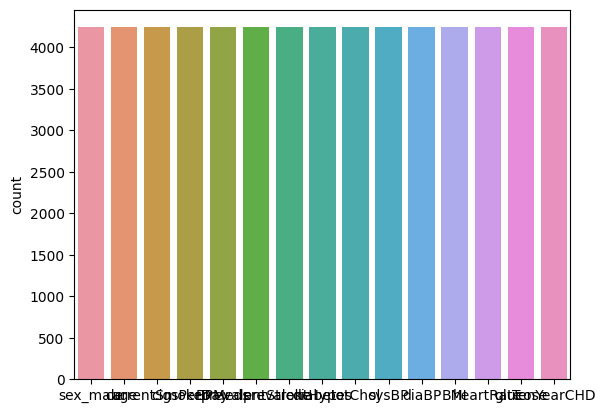

In [10]:
#Code
sn.countplot(df)
plt.show()

###Q6a. Split the dataset into train and test and fit the training dataset in the Logistic Regression.

In [11]:
#Split the dataset and fit the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [17]:
y=df[['currentSmoker']]

In [18]:
X=df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]


from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
SimpleImputer()
X=imp.transform(X)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1
 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0
 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1
 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0
 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1
 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 1 1 1 1 1 1 0 1 1 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.0

Confusion Matrix:
 [[447   0]
 [  0 401]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       401

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848



###Q6b. Does running the above code give a Convergence Warning? What could be the cause of this problem? Try to find out methods that can deal with this problem.

Although there are several methods, we will use backward feature selection to solve this problem. You can learn more about feature selection using the below link.

https://www.javatpoint.com/feature-selection-techniques-in-machine-learning

Understand and run the following 4 cells which carry out backward feature selection for you. Make sure to replace 'df' by your dataframe variable

In [22]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

,const,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [26]:
print(df['TenYearCHD'].head(100))

0     0
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    0
99    0
Name: TenYearCHD, Length: 100, dtype: int64


In [44]:


# Create a pandas DataFrame with NaN and Inf values
df_new = pd.DataFrame({'TenYearCHD'})

# Drop NaN and Inf values
df_new = df.replace([np.inf, -np.inf], np.nan).dropna()

print(df_new)



      sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0            1   39              0         0.0     0.0                0   
1            0   46              0         0.0     0.0                0   
2            1   48              1        20.0     0.0                0   
3            0   61              1        30.0     0.0                0   
4            0   46              1        23.0     0.0                0   
...        ...  ...            ...         ...     ...              ...   
4233         1   50              1         1.0     0.0                0   
4234         1   51              1        43.0     0.0                0   
4237         0   52              0         0.0     0.0                0   
4238         1   40              0         0.0     0.0                0   
4239         0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0        

In [46]:
df_constant=df_constant.flatten()

In [ ]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols = df_constant.columns[:-1]

model = sm.Logit(df.TenYearCHD, df_constant[cols])
result = model.fit()
result.summary()

In [ ]:
def back_feature_elem (data_frame, dep_var, col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
result = back_feature_elem(df_constant, df.TenYearCHD, cols)
result.summary()

In [ ]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

###Q7. The above table mentions the columns with the highest importance. Create a new dataframe with just these columns and your target column. Split it into training and testing dataset and fit the training data into Logistic regression model. Also predict the y values for the test set.

In [ ]:
#Split the new dataset and fit the model


In [ ]:
#Split the dataset and fit the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
y=df[['currentSmoker']]

In [ ]:
X=df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]


from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
SimpleImputer()
X=imp.transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1
 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0
 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1
 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0
 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1
 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 1 1 1 1 1 1 0 1 1 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Q8a. Create a confusion matrix for y test and y predcted values. Since this is prediction of heart disease which metric should be given more importance - Precision or Recall? Justify.

In [48]:
#Code for confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[447   0]
 [  0 401]]


###Q8b. Using the above confusion matrix, how would you find out Accuracy, Precision and Recall values. Calculate them using the formulae which takes into account True Positive, False Positive, True Negative and False Negative values.

In [49]:
# Confusion matrix values
TP = 447
TN = 0
FP = 0
FN = 401

# Calculations
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.53
Precision: 1.00
Recall: 0.53
